In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from astropy.stats import sigma_clip
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)
pd.options.mode.chained_assignment = None

In [3]:
# read in dataframe
df_orig = pd.read_csv('final_data_files/uncrowded_withresid_m4.csv')

df = df_orig[(np.isfinite(df_orig.mag_j)) & (np.isfinite(df_orig.mag_h)) & (np.isfinite(df_orig.mag_k)) &
        (np.isfinite(df_orig.resid_m4_3)) & (np.isfinite(df_orig.mag_4))]

df1 = df[df.type == 0]
df2 = df[df.type == 1]

# show column names for reference
print df.columns.values

['id' 'mag_j' 'merr_j' 'type' 'per' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'resid_m4_j' 'resid_m4_h' 'resid_m4_k'
 'resid_m4_3' 'resid_m4_4']


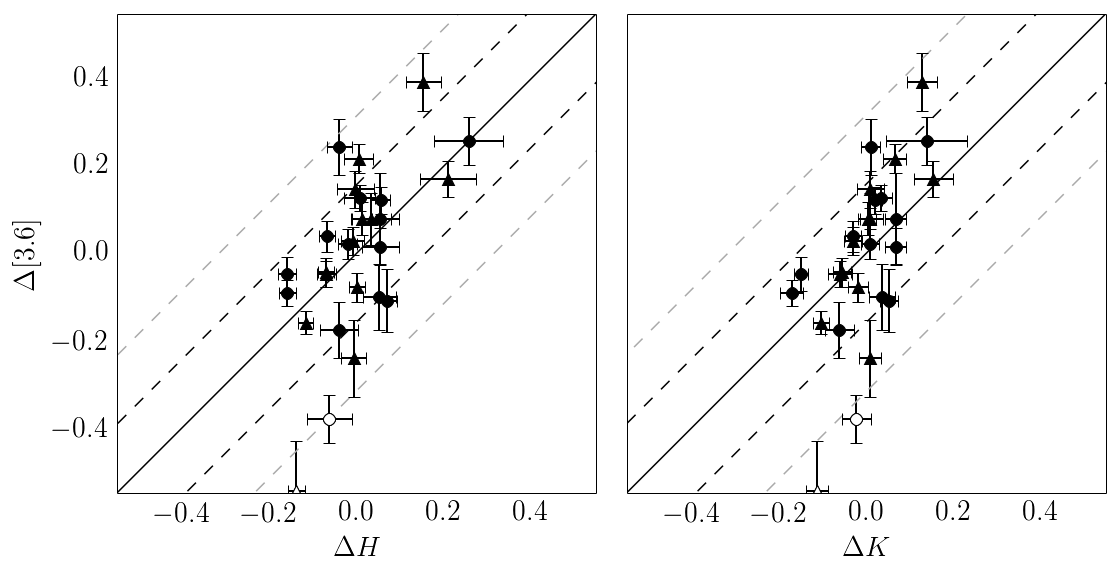

In [4]:
df['resid_h_4'] = df['resid_m4_h'] - df['resid_m4_4']
df['resid_k_4'] = df['resid_m4_k'] - df['resid_m4_4']
fig = plt.figure(figsize=(8,5))
j = 1
xspace = np.linspace(-1,1,10)
for i in ['h','k']:
    df['resid_' + i + '_4'] = df['resid_m4_' + i] - df['resid_m4_4']
    if i == 'h':
        clipped_h = sigma_clip(df['resid_h_4'], 2)
        bad_only_h = df[clipped_h.mask]
        bad_only_h0 = bad_only_h[bad_only_h.type == 0]
        bad_only_h1 = bad_only_h[bad_only_h.type == 1]
    if i == 'k':
        clipped_k = sigma_clip(df['resid_k_4'], 2)
        bad_only_k = df[clipped_k.mask]
        bad_only_k0 = bad_only_k[bad_only_k.type == 0]
        bad_only_k1 = bad_only_k[bad_only_k.type == 1]
    ax = fig.add_subplot(1,2,j, aspect='equal')
    sig = np.std(df['resid_' + i + '_4'])
    ppl.plot(ax, xspace, xspace, 'k-')
    ppl.plot(ax, xspace, xspace + sig, 'k--')
    ppl.plot(ax, xspace, xspace - sig, 'k--')
    ppl.plot(ax, xspace, xspace + 2*sig, '--', color='#AAAAAA')
    ppl.plot(ax, xspace, xspace - 2*sig, '--', color='#AAAAAA')
    ax.errorbar(df1['resid_m4_' + i], df1['resid_m4_4'],
                xerr=df1['merr_' + i], yerr=df1['merr_4'], fmt='o', color='k')
    ax.errorbar(df2['resid_m4_' + i], df2['resid_m4_4'],
                xerr=df2['merr_' + i], yerr=df2['merr_4'], fmt='^', color='k')
    if i == 'h':
        ax.plot(bad_only_h0['resid_m4_h'], bad_only_h0['resid_m4_4'], 'o', color='w')
        ax.plot(bad_only_h1['resid_m4_h'], bad_only_h1['resid_m4_4'], '^', color='w')
        ax.set_ylabel('$\Delta [3.6]$')
    if i == 'k':
        ax.plot(bad_only_k0['resid_m4_k'], bad_only_k0['resid_m4_4'], 'o', color='w')
        ax.plot(bad_only_k1['resid_m4_k'], bad_only_k1['resid_m4_4'], '^', color='w')
        ax.set_yticks([])
    ax.set_ylim(-0.55,0.55)
    ax.set_xlim(ax.get_ylim())
    ax.set_xlabel('$\Delta {}$'.format(i.upper()))
    j += 1
fig.tight_layout()
# fig.savefig('final_plots/delta_delta_hk3.pdf')

In [5]:
bad_only_h

,id,mag_j,merr_j,type,per,mag_h,merr_h,mag_k,merr_k,mag_3,merr_3,mag_4,merr_4,resid_m4_j,resid_m4_h,resid_m4_k,resid_m4_3,resid_m4_4,resid_h_4,resid_k_4
27,40,13.517321,0.022078,0,0.634072,13.250208,0.051022,13.153101,0.033127,13.061828,0.049227,13.416159,0.056036,-0.069285,-0.062253,-0.022446,0.003775,-0.380209,0.317956,0.357763
87,169,13.805114,0.012780,1,0.319116,13.735499,0.019423,13.652310,0.025181,13.734405,0.049790,14.001441,0.115631,-0.044367,-0.138620,-0.112114,-0.270839,-0.545167,0.406547,0.433053


In [6]:
bad_only_k

,id,mag_j,merr_j,type,per,mag_h,merr_h,mag_k,merr_k,mag_3,merr_3,mag_4,merr_4,resid_m4_j,resid_m4_h,resid_m4_k,resid_m4_3,resid_m4_4,resid_h_4,resid_k_4
27,40,13.517321,0.022078,0,0.634072,13.250208,0.051022,13.153101,0.033127,13.061828,0.049227,13.416159,0.056036,-0.069285,-0.062253,-0.022446,0.003775,-0.380209,0.317956,0.357763
87,169,13.805114,0.012780,1,0.319116,13.735499,0.019423,13.652310,0.025181,13.734405,0.049790,14.001441,0.115631,-0.044367,-0.138620,-0.112114,-0.270839,-0.545167,0.406547,0.433053
